## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors

Omar Abbasi: Project Administration, Conceptualization, Formal Analysis, Visualization, Writing – Original Draft  
Zahir Ali: Conceptualization, Visualization, Software, Writing – Reviewing/Edits  
Adam Hamadene: Research, Formal Analysis  
Mostafa Darwish: Visualization, Writing – Original Draft, Data Curation  
Yasir Rizvi: Data Cleaning 


## Research Question

How do funding size, industry sector, and geographic location influence both the likelihood and timing of startup failure versus acquisition?



## Background and Prior Work

As the world continues to see the intersection of human ingenuity and technological accumulation grow extremely rapidly, this shift in the corporate landscape can be tied back to a specific niche: the prevalence and growth of startups in the post-modern era. As technical knowledge and tools continue to develop, human ingenuity has found itself employed in finding the most useful ways to leverage and expand upon the current era of technology and artificial intelligence. Examples of post-modern startups include Uber, Robinhood, Stripe, Databricks, Canva, and Slack. Ideas for growth and innovation stem from all fields, and are catalyzed from a variety of sources such as corporate America, educational insititutions, and small communities all across the country. However, although the majority of the startups known today are those that found success in climbing the barrier between idea and impact, it is the majority that fall short of overcoming this hurdle and end up failing as a product. In this report, we aim to look at a multitude of variables directly and intrinsically tied to startups and their growth, to determine the coefficient of correlation between various factors such as industry sector, funding, location, and size, and how they impact a startup's ability to come to fruition. Because the growth of startups is relatively new and tied to very modern technological advancements, there is a scarce amount of research done into the causes behind their success and failures. For example, venture capital firms and startup accelerators such as Y Combinator were founded in 2005, making the funding rounds for successful startups a very new principle. Our curiosity lies in looking at the underlying details of the successes and failures for startups in the United States, as it provides an opportunity to discover findings in a modern niche that does not possess the level of academic study that other corporate fields in America do.


## Hypothesis


Startups with larger funding sizes, operating in high-growth industry sectors, and located within established entrepreneurial ecosystems are less likely to fail and tend to experience longer survival times before either failure or acquisition, whereas startups with smaller funding, in low-growth sectors, or in emerging regions face higher failure risks and shorter time-to-event durations. 


## Data

### Data overview

- **Dataset #1**
- **Dataset Name**: Startup Success Prediction
  - **Link to the dataset**: 'https://www.kaggle.com/datasets/manishkc06/startup-success-prediction/data'
  - **Number of observations**: 922 
  - **Number of variables**: 49 
  - **Most relevant variables for our project**:
    - Name/ID: name (entity key used for de-duplication)
    - Industry/Sector: labels (needs standardization to top-level sector groups)
    - Geography: e.g., city, state_code (normalize to country/region for stratification)
    - Funding: e.g., funding_total_usd, first_funding_at, last_funding_at, funding_rounds (USD; heavy-tailed; consider log/winsorization)
    - Outcome/Status: status (map to success/failure/censored)
    - Timing: founded_at, closed_at (parsed to datetime for time to event metrics)
  - **Shortcomings / caveats**:
    - Sector taxonomy in labels is noisy; requires collapsing to a consistent hierarchy
    - Coverage/selection bias (by region/state/stage) likely; report as limitation and consider cohort/time controls
    - Event labeling: status may lag reality; treat "operating" as censored in survival framing
    - Date gaps: Missing founded_at/closed_at can bias time-to-event; document drop/impute rules


- **Dataset #2**
  - **Dataset Name**: Big Startup Success/Fail Dataset from Crunchbase
  - **Link to the dataset**: `https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase`
  - **Number of observations**: Computed in the code cell below (after loading)
  - **Number of variables**: Computed in the code cell below (after loading)
  - **Most relevant variables for our project**:
    - Funding-related: `funding_total_usd` (or similar), `funding_rounds`, `last_funding_at`
    - Outcome/status: `status` (e.g., acquired/ipo/operating/closed), `acquired_at`, `closed_at`
    - Company profile: `name`, `category`/`industry`, `country`, `region`/`city`, `num_employees`
    - Timing: `founded_at` (and event dates as above) for computing time-to-failure or time-to-acquisition
  - **Shortcomings / caveats**:
    - Potential label noise: outcomes may be simplified; “operating” does not guarantee long-term success; “closed” labels may lag reality
    - Missing or inconsistent dates across companies, which affects survival/time-to-event analyses
    - Possible duplicates or multiple rows for the same company over time; category/industry taxonomy can be messy
    - Survivorship and reporting bias inherent to Crunchbase; geographic and sector coverage is uneven

If we combine datasets, we will align on common keys (e.g., standardized company names and/or website domains), and normalize geography (country/region) and industry taxonomies before joining.

In [10]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Successfully downloaded: airline-safety.csv


Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00, 17.85it/s]

Successfully downloaded: bad-drivers.csv


### Dataset #1 — Startup Attributes & Sectors (Uploaded File)

- **What it is**: 922 startups × 49 columns with identity, sector tags, geography, funding, timing, and status.
- **Why it matters**: Complements Crunchbase outcomes; gives clean attributes for joining and modeling.
- **Key fields**: `name`, `labels` (sector), `city`, `state_code`, `funding_total_usd`, `funding_rounds`, `first_funding_at`, `last_funding_at`, `founded_at`, `closed_at`, `status`.
- **Quality notes**: Some sector and date noise; mild geographic imbalance; heavy‑tailed funding.
- **Usage**: Feature engineering and cross‑dataset join keys; baseline EDA on funding/sector/location.


In [12]:
# Dataset #1 — Load, Tidy, Profile, and Clean
import pandas as pd
import numpy as np
from pathlib import Path

RAW_DIR = Path("data/00-raw")
INTERIM_DIR = Path("data/01-interim")
PROCESSED_DIR = Path("data/02-processed")
for d in [RAW_DIR, INTERIM_DIR, PROCESSED_DIR]:
    d.mkdir(parents=True, exist_ok=True)

raw_path = RAW_DIR / "startup_data.csv"  
df = pd.read_csv(raw_path)
print(f"✅ Loaded dataset from: {raw_path}")


df.columns = (
    df.columns.str.strip()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
    .str.replace(".", "_")
    .str.lower()
)


print(f"Shape (rows, columns): {df.shape}")


print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


missing_pct = (df.isna().mean() * 100).round(1).sort_values(ascending=False)
print("\n🔍 Missingness (% of missing values per column):")
print(missing_pct.head(10))


nan_corr = df.isna().corr()
if nan_corr.shape[0] > 1:
    print("\nTop correlated missingness (possible systematic gaps):")
    corr_pairs = (
        nan_corr.unstack()
        .sort_values(ascending=False)
        .drop_duplicates()
        .head(10)
    )
    print(corr_pairs)

if "funding_total_usd" in df.columns:
    series = pd.to_numeric(df["funding_total_usd"], errors="coerce").dropna()
    if len(series) > 0:
        q1, q3 = np.percentile(series, [25, 75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        df["funding_outlier_flag"] = (
            (df["funding_total_usd"] < lower) | (df["funding_total_usd"] > upper)
        )
        print(
            f"\n💰 Outlier detection for funding_total_usd:\n"
            f"IQR bounds = [{lower:,.0f}, {upper:,.0f}]\n"
            f"Outliers flagged: {df['funding_outlier_flag'].sum()} rows"
        )
    else:
        df["funding_outlier_flag"] = False
else:
    print("\n⚠️ No 'funding_total_usd' column found for outlier analysis.")
    df["funding_outlier_flag"] = False

before = len(df)
df = df.drop_duplicates()
if {"name", "status"}.issubset(df.columns):
    df = df.dropna(subset=["name", "status"], how="all")
print(f"\n🧹 Cleaned dataset: {before} -> {len(df)} rows after cleaning.")

important_vars = [c for c in ["funding_total_usd", "funding_rounds", "status", "city", "state_code"] if c in df.columns]
print("\n📊 Summary statistics for key variables:")
print(df[important_vars].describe(include="all").transpose().iloc[:10])

processed_path = PROCESSED_DIR / "dataset1_startup_data_processed.csv"
df.to_csv(processed_path, index=False)
print(f"\n✅ Cleaned dataset saved to: {processed_path}")




✅ Loaded dataset from: data/00-raw/startup_data.csv
Shape (rows, columns): (923, 49)
The dataset contains 923 rows and 49 columns.

🔍 Missingness (% of missing values per column):
closed_at                   63.7
unnamed:_6                  53.4
age_last_milestone_year     16.5
age_first_milestone_year    16.5
state_code_1                 0.1
unnamed:_0                   0.0
is_biotech                   0.0
is_software                  0.0
is_web                       0.0
is_mobile                    0.0
dtype: float64

Top correlated missingness (possible systematic gaps):
unnamed:_6                unnamed:_6      1.000000
                          closed_at       0.139718
                          state_code_1    0.030757
age_first_milestone_year  state_code_1   -0.014623
closed_at                 state_code_1   -0.043632
age_first_milestone_year  unnamed:_6     -0.118216
                          closed_at      -0.302727
unnamed:_0                unnamed:_0           NaN
dtype: floa

### Dataset #2 — Crunchbase Startup Outcomes (Failure vs. Acquisition)

- **What it is**: ~66k startups with profile, funding history, geography, and outcome labels (`operating`, `acquired`, `ipo`, `closed`).
- **Why it matters**: Core table for outcome modeling (success vs. failure) and time‑to‑event analysis.
- **Key fields**: `name`, `category_list` → `industry_primary`, `country_code`/`state_code`/`region`/`city`, `funding_total_usd`, `funding_rounds`, `first_funding_at`, `last_funding_at`, `founded_at`, `acquired_at`, `closed_at`, `status`.
- **Quality notes**: Heavy‑tailed funding; noisy/heterogeneous categories; some missing/lagged event dates.
- **Usage**: Derive `outcome_label` (success/failure/censored), compute `time_to_event_days`, profile geography/industry, and export cleaned CSV for modeling.


In [4]:
# Crunchbase Startup Success/Fail — Load, Clean, Tidy, Wrangle
#
# Notes:
# - Place the Kaggle CSV from the dataset into `data/00-raw/`.
# - If multiple CSVs exist, this cell attempts to auto-detect the most likely file.
# - Adjust `RAW_FILENAME_OVERRIDE` if auto-detection fails.

from __future__ import annotations

from pathlib import Path
from typing import Optional, List, Dict

import pandas as pd
import numpy as np

RAW_DIR = Path("data/00-raw")
INTERIM_DIR = Path("data/01-interim")
PROCESSED_DIR = Path("data/02-processed")

INTERIM_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# If you know the exact filename, set it here; otherwise keep as None
RAW_FILENAME_OVERRIDE: Optional[str] = "dataset2.csv"  # renamed for consistency

# Heuristics for picking likely files
LIKELY_SUBSTRINGS: List[str] = [
    "crunchbase",
    "startup",
    "startups",
    "success",
    "fail",
]


def pick_raw_file(raw_dir: Path, override: Optional[str]) -> Path:
    """Pick the most likely raw CSV file for the Crunchbase dataset.

    Args:
        raw_dir: Directory containing raw files.
        override: Explicit filename if known.

    Returns:
        Path to the selected CSV file.

    Raises:
        FileNotFoundError: If no suitable file is found.
    """
    if override is not None:
        candidate = raw_dir / override
        if candidate.exists():
            return candidate
        raise FileNotFoundError(
            f"Override file not found: {candidate}. Place it in {raw_dir} or update RAW_FILENAME_OVERRIDE."
        )

    csvs = sorted(raw_dir.glob("*.csv"))
    if not csvs:
        raise FileNotFoundError(
            f"No CSV files found in {raw_dir}. Download the Kaggle dataset and place the CSV here."
        )

    # Rank by substring match then by size (descending)
    def score(p: Path) -> tuple[int, int]:
        name = p.name.lower()
        match_score = sum(1 for s in LIKELY_SUBSTRINGS if s in name)
        size_score = p.stat().st_size
        return (match_score, size_score)

    ranked = sorted(csvs, key=score, reverse=True)
    return ranked[0]


raw_path = pick_raw_file(RAW_DIR, RAW_FILENAME_OVERRIDE)
print(f"Selected raw file: {raw_path}")

# Load data
# Use low_memory=False for mixed types, and keep original column names for inspection before standardization
raw_df = pd.read_csv(raw_path, low_memory=False)
print(f"Raw shape: {raw_df.shape}")

# Standardize column names: snake_case
raw_df.columns = (
    raw_df.columns.str.strip().str.replace(" ", "_", regex=False).str.replace("-", "_", regex=False).str.lower()
)

# Basic de-duplication by exact row match and by name if present
if "name" in raw_df.columns:
    before = len(raw_df)
    raw_df = raw_df.drop_duplicates()
    raw_df = raw_df.drop_duplicates(subset=["name"], keep="first")
    print(f"Dropped duplicates -> {before} -> {len(raw_df)} rows")
else:
    raw_df = raw_df.drop_duplicates()

# Identify key columns by fuzzy names
def find_col(candidates: List[str]) -> Optional[str]:
    cols = set(raw_df.columns)
    for c in candidates:
        if c in cols:
            return c
    return None

col_name = find_col(["name", "company", "company_name"])
col_status = find_col(["status", "state", "current_status"])  # typical outcome label
col_funded_total = find_col(["funding_total_usd", "funding_total", "total_funding_usd", "total_funding"])
col_rounds = find_col(["funding_rounds", "num_funding_rounds", "rounds"])
col_category = find_col(["category", "category_list", "industry", "category_groups"])
col_country = find_col(["country", "country_code", "country_iso", "country_name"])
col_state = find_col(["state_code", "state"])
col_region = find_col(["region", "state_region"])  # keep region separate from city
col_city = find_col(["city", "location"])  # prefer explicit city when available
col_founded = find_col(["founded_at", "founded", "founded_date"])  # date-like
col_acquired = find_col(["acquired_at", "acquired", "acquisition_date"])  # date-like
col_closed = find_col(["closed_at", "closed", "closing_date"])  # date-like
col_first_funding = find_col(["first_funding_at", "first_funding_date"])  # date-like
col_last_funding = find_col(["last_funding_at", "last_funding_date"])  # date-like
col_employees = find_col(["num_employees", "employee_count", "employees"])

# Restrict to relevant columns (retain existing only)
keep_cols: List[str] = [
    c
    for c in [
        col_name,
        col_status,
        col_funded_total,
        col_rounds,
        col_category,
        col_country,
        col_state,
        col_region,
        col_city,
        col_founded,
        col_acquired,
        col_closed,
        col_first_funding,
        col_last_funding,
        col_employees,
    ]
    if c is not None
]

work_df = raw_df[keep_cols].copy()
print(f"Working shape (selected columns): {work_df.shape}")

# Parse dates where present
for dcol in [col_founded, col_acquired, col_closed, col_first_funding, col_last_funding]:
    if dcol is not None and dcol in work_df.columns:
        work_df[dcol] = pd.to_datetime(work_df[dcol], errors="coerce")

# Coerce funding to numeric USD if present
if col_funded_total is not None and col_funded_total in work_df.columns:
    # Remove currency symbols/commas if any
    work_df[col_funded_total] = (
        work_df[col_funded_total]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("$", "", regex=False)
        .str.strip()
    )
    work_df[col_funded_total] = pd.to_numeric(work_df[col_funded_total], errors="coerce")

# Derive primary industry from category_list-like column
if col_category is not None and col_category in work_df.columns:
    work_df["industry_primary"] = (
        work_df[col_category]
        .astype("string")
        .str.split("|")
        .str[0]
        .str.strip()
    )

# Derive outcome label: success/failure/censored
# success: acquired or IPO; failure: closed; censored: operating/others with no terminal date
def derive_outcome(status_val: Optional[str]) -> Optional[str]:
    if status_val is None or pd.isna(status_val):
        return None
    s = str(status_val).strip().lower()
    if any(tok in s for tok in ["acquired", "ipo"]):
        return "success"
    if "closed" in s:
        return "failure"
    if any(tok in s for tok in ["operating", "active"]):
        return "censored"
    return None

if col_status is not None and col_status in work_df.columns:
    work_df["outcome_label"] = work_df[col_status].map(derive_outcome)
else:
    work_df["outcome_label"] = None

# Time-to-event from founded to first terminal event if present
def pick_event_date(row: pd.Series) -> pd.Timestamp | pd.NaT:
    # prefer acquired/closed dates; else NaT
    acquired_date = row[col_acquired] if col_acquired in row and pd.notna(row[col_acquired]) else pd.NaT
    closed_date = row[col_closed] if col_closed in row and pd.notna(row[col_closed]) else pd.NaT
    # pick whichever is earliest non-NaT
    if pd.notna(acquired_date) and pd.notna(closed_date):
        return min(acquired_date, closed_date)
    if pd.notna(acquired_date):
        return acquired_date
    if pd.notna(closed_date):
        return closed_date
    return pd.NaT

if col_founded is not None and col_founded in work_df.columns:
    work_df["event_date"] = work_df.apply(pick_event_date, axis=1)
    work_df["time_to_event_days"] = (
        work_df["event_date"] - work_df[col_founded]
    ).dt.days
else:
    work_df["event_date"] = pd.NaT
    work_df["time_to_event_days"] = np.nan

# Missingness profile
missing_pct = work_df.isna().mean().sort_values(ascending=False)
print("\nMissingness (% of rows missing per column):")
print((missing_pct * 100).round(1))

# Flag outliers in funding (IQR method)
if col_funded_total is not None and col_funded_total in work_df.columns:
    fund = work_df[col_funded_total].dropna()
    if len(fund) > 0:
        q1, q3 = np.percentile(fund, [25, 75])
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = max(0, q1 - 1.5 * iqr)
        work_df["funding_outlier_flag"] = (
            (work_df[col_funded_total] < lower) | (work_df[col_funded_total] > upper)
        )
        print(
            f"Funding IQR bounds -> lower={lower:,.0f}, upper={upper:,.0f}; "
            f"outliers flagged: {work_df['funding_outlier_flag'].sum()}"
        )
    else:
        work_df["funding_outlier_flag"] = False
else:
    work_df["funding_outlier_flag"] = False

# Minimal cleaning: drop rows with no name and no status
min_keep_cols = [c for c in [col_name, col_status] if c is not None]
if min_keep_cols:
    before = len(work_df)
    work_df = work_df.dropna(subset=min_keep_cols, how="all")
    print(f"Dropped rows missing all of {min_keep_cols}: {before} -> {len(work_df)}")

# Save processed
processed_path = PROCESSED_DIR / "startups_crunchbase_processed.csv"
work_df.to_csv(processed_path, index=False)
print(f"\nProcessed file written to: {processed_path}")

# Summary (expanded to reflect all relevant data sources)
summary = {
    "n_rows": len(work_df),
    "n_cols": work_df.shape[1],
    "outcome_counts": work_df["outcome_label"].value_counts(dropna=False).to_dict() if "outcome_label" in work_df else {},
}

if col_funded_total in work_df.columns:
    fund = work_df[col_funded_total]
    summary["funding_total_usd"] = {
        "non_null": int(fund.notna().sum()),
        "mean": float(np.nanmean(fund)),
        "median": float(np.nanmedian(fund)),
        "p90": float(np.nanpercentile(fund.dropna(), 90)) if fund.notna().any() else None,
    }

if col_country in work_df.columns:
    summary["top_countries"] = work_df[col_country].value_counts(dropna=False).head(5).to_dict()
if col_region in work_df.columns:
    summary["top_regions"] = work_df[col_region].value_counts(dropna=False).head(5).to_dict()
if col_city in work_df.columns:
    summary["top_cities"] = work_df[col_city].value_counts(dropna=False).head(5).to_dict()
if "industry_primary" in work_df.columns:
    summary["top_industries"] = work_df["industry_primary"].value_counts(dropna=False).head(5).to_dict()

print("\nSummary:")
print(summary)


Selected raw file: data/00-raw/dataset2.csv
Raw shape: (66368, 14)
Dropped duplicates -> 66368 -> 66103 rows
Working shape (selected columns): (66103, 12)

Missingness (% of rows missing per column):
event_date            100.0
time_to_event_days    100.0
founded_at             22.9
funding_total_usd      19.2
state_code             12.9
region                 12.1
city                   12.1
country_code           10.5
category_list           4.7
industry_primary        4.7
first_funding_at        0.0
name                    0.0
status                  0.0
funding_rounds          0.0
last_funding_at         0.0
outcome_label           0.0
dtype: float64
Funding IQR bounds -> lower=0, upper=24,495,250; outliers flagged: 7363
Dropped rows missing all of ['name', 'status']: 66103 -> 66103

Processed file written to: data/02-processed/startups_crunchbase_processed.csv

Summary:
{'n_rows': 66103, 'n_cols': 17, 'outcome_counts': {'censored': 52812, 'success': 7088, 'failure': 6203}, 'fundin

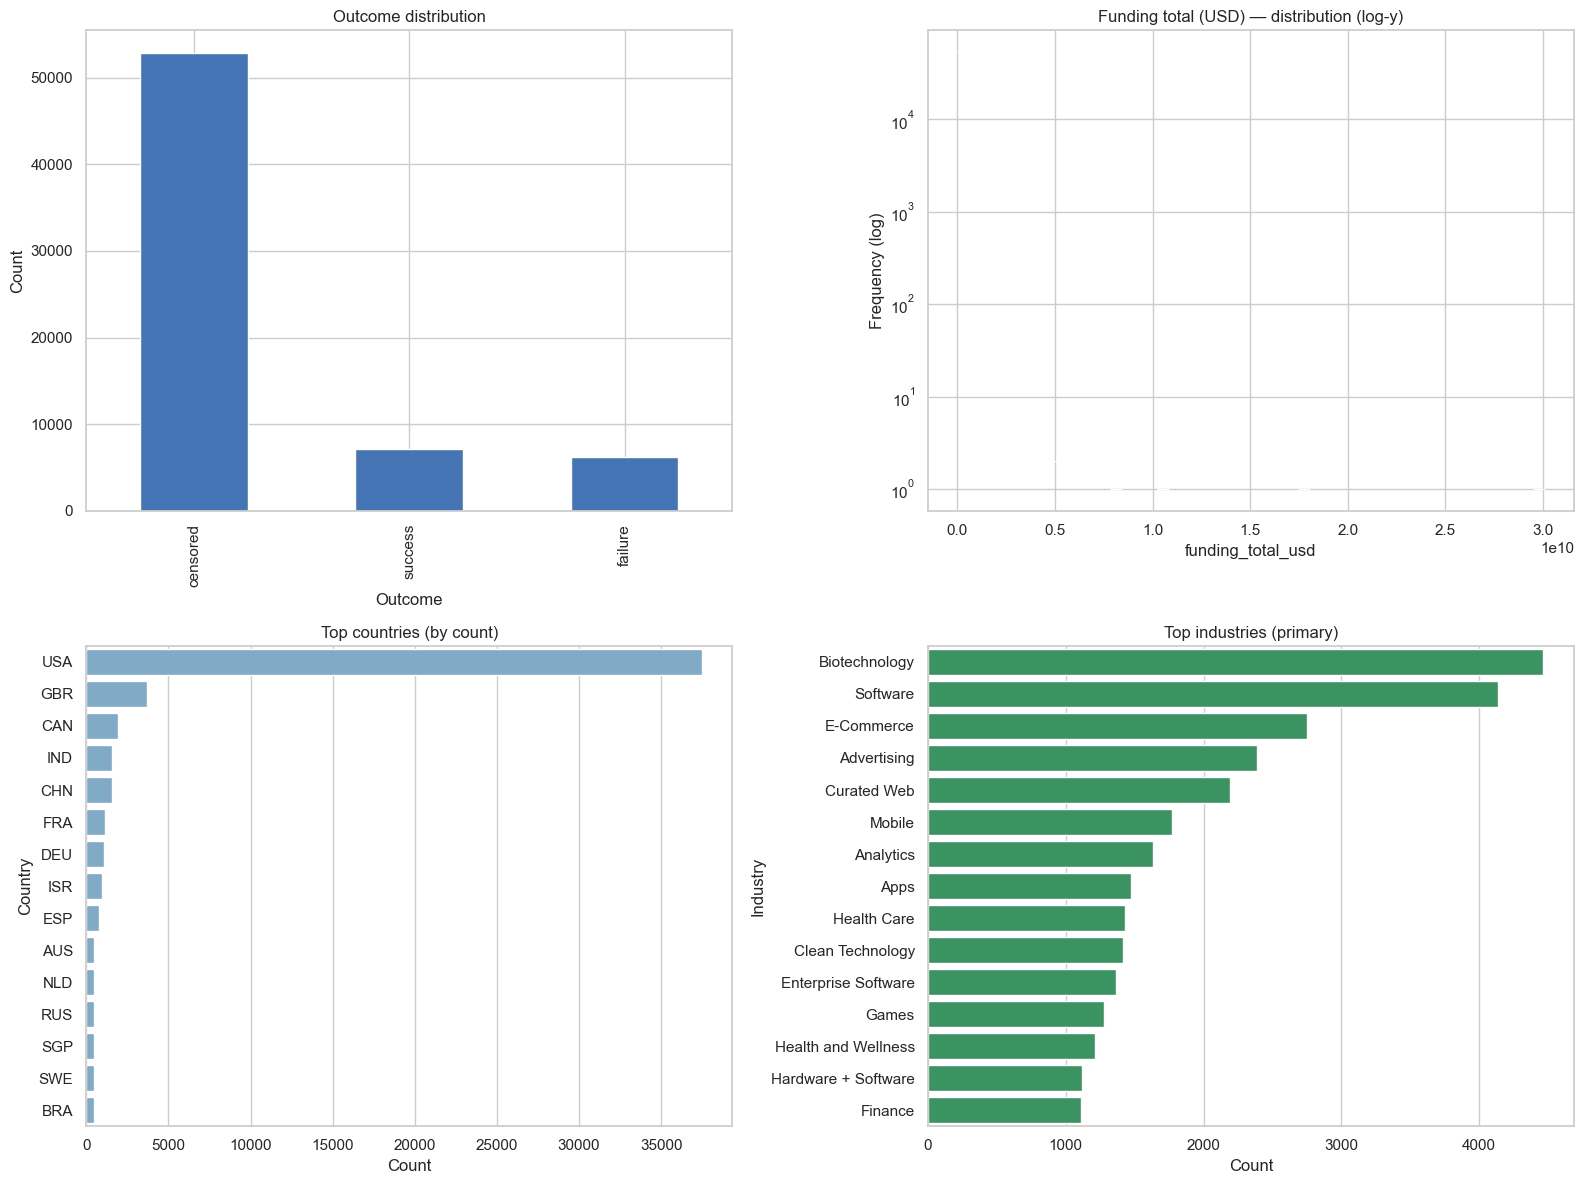

In [5]:
# Quick visual profile of key variables (status, funding, geography, industry)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
ax = axes.ravel()
plot_idx = 0

# 1) Outcome distribution
if "outcome_label" in work_df.columns:
    work_df["outcome_label"].value_counts(dropna=False).plot(
        kind="bar", ax=ax[plot_idx], color="#4575b4"
    )
    ax[plot_idx].set_title("Outcome distribution")
    ax[plot_idx].set_xlabel("Outcome")
    ax[plot_idx].set_ylabel("Count")
else:
    ax[plot_idx].text(0.5, 0.5, "No outcome_label column", ha="center")
    ax[plot_idx].set_axis_off()
plot_idx += 1

# 2) Funding histogram (log scale)
if "funding_total_usd" in work_df.columns:
    sns.histplot(
        work_df["funding_total_usd"],
        bins=50,
        ax=ax[plot_idx],
        color="#d7301f",
        log_scale=(False, True),  # y-axis log to show heavy tail
    )
    ax[plot_idx].set_title("Funding total (USD) — distribution (log-y)")
    ax[plot_idx].set_xlabel("funding_total_usd")
    ax[plot_idx].set_ylabel("Frequency (log)")
else:
    ax[plot_idx].text(0.5, 0.5, "No funding_total_usd column", ha="center")
    ax[plot_idx].set_axis_off()
plot_idx += 1

# 3) Top geography (country or region)
if "country_code" in work_df.columns and work_df["country_code"].notna().any():
    top_geo = work_df["country_code"].value_counts().head(15)
    sns.barplot(x=top_geo.values, y=top_geo.index, ax=ax[plot_idx], color="#74add1")
    ax[plot_idx].set_title("Top countries (by count)")
    ax[plot_idx].set_xlabel("Count")
    ax[plot_idx].set_ylabel("Country")
elif "region" in work_df.columns and work_df["region"].notna().any():
    top_geo = work_df["region"].value_counts().head(15)
    sns.barplot(x=top_geo.values, y=top_geo.index, ax=ax[plot_idx], color="#74add1")
    ax[plot_idx].set_title("Top regions (by count)")
    ax[plot_idx].set_xlabel("Count")
    ax[plot_idx].set_ylabel("Region")
else:
    ax[plot_idx].text(0.5, 0.5, "No country/region column", ha="center")
    ax[plot_idx].set_axis_off()
plot_idx += 1

# 4) Top industries (primary)
if "industry_primary" in work_df.columns and work_df["industry_primary"].notna().any():
    top_ind = work_df["industry_primary"].value_counts().head(15)
    sns.barplot(x=top_ind.values, y=top_ind.index, ax=ax[plot_idx], color="#2ca25f")
    ax[plot_idx].set_title("Top industries (primary)")
    ax[plot_idx].set_xlabel("Count")
    ax[plot_idx].set_ylabel("Industry")
elif "category_list" in work_df.columns and work_df["category_list"].notna().any():
    # Fallback: show top first-category tokens directly
    primary = work_df["category_list"].astype("string").str.split("|").str[0].str.strip()
    top_ind = primary.value_counts().head(15)
    sns.barplot(x=top_ind.values, y=top_ind.index, ax=ax[plot_idx], color="#2ca25f")
    ax[plot_idx].set_title("Top industries (derived from category_list)")
    ax[plot_idx].set_xlabel("Count")
    ax[plot_idx].set_ylabel("Industry")
else:
    ax[plot_idx].text(0.5, 0.5, "No industry field available", ha="center")
    ax[plot_idx].set_axis_off()

plt.tight_layout()
plt.show()


## Ethics

- **Bias & fairness:** Datasets may favor startups or sectors that are much higher in popularity and show a bias towards well known startups. There are also concerns with issues of generlzation as some areas may have high density of startups compared to others potential misrepresenting the data.
- **Generalization limits:** As mentioned previously, Kaggle datasets in particular may overrepresent high success startups due to the ease of accessing the data. This results in the data not geenrlazaing to non-tech or smaller companies. We intend to avoid general claims and make specifc statements that are contextualized by environment maturity.
- **Data sensitivity:** Although the data gathered is public, names and emails can be used to reidenifty an individual, or any specific data points that can be used to triangulate a person or startup. 
- **Non-Consensual Use of Company Information:** Despite the data being public, startups in the dataset did not consent to be analyzed or used for prediction exercises. We will be using aggregated analysis and not single out any companies.
- **Potential Misrepresentation Due to Inaccurate or Incomplete Data:** Startup databases are often incomplete, outdated, or wrong because the data is crowdsourced. We will treat the data as approximate and emphasize uncertainty rather than presenting results as definitive truth.
- **Responsibility to Prevent Harmful Use of Results:** If someone misuses the findings it may influence funding or hiring decisions, or perceptions of certain industries/regions. We will explicitly state that the work should not be used for investment decisions.


## Team Expectations 

In regard to communication, we plan on using iMessage to text one another. We believe this is one of the most efficient and easiest ways for us to contact one another. As for the  messaging itself, all members have agreed to expect a response, whether that be a message or a reaction, from each group member within 3 hours of the initial text being sent. We will meet twice per week, every Monday morning, we will reserve a study space in the Geisel Library to meet and provide updates, followed by a Zoom meeting every Friday afternoon to consolidate the designated progress from Monday's meeting. In regard to tone, we agree to all expect respectful interactions. Even when a disagreement takes place, the person expressing a lack of approval should explain their reasoning, as well as an alternative method that they believe is better. We will be concise and to the point, but still maintain respect for one another and everyone's ideas. We plan to use voting to make decisions as a group, especially for disagreements and changes to our original plan. The project administrator will be in charge of calling the vote, and we will go with the majority ruling, as we have 5 people. We will not accept abstaining from votes. We have specialized roles for each person; however, because there is overlap, we do plan to share many of the responsibilities. As we are a team, we plan on helping each other out when possible, especially if one person is struggling with a specific task. We assign roles and tasks based on the skillsets of the members, which we have already discussed in detail. We have set a policy that struggles are inevitable, as we are all busy. We have a guideline that whenever someone is falling behind, there is no hassle or problem in expressing that as early as possible. We would rather know what to fix earlier in the process, rather than have a last-minute lack of execution. Struggles with certain tasks should be expressed immediately, as we will set egos aside to help regardless of role/assigned tasks, in order to prioritize the team as a unit/whole.


## Project Timeline Proposal

Monday, Week 3: Meeting to go over each member's final proposal for the idea they would like to put forward
Friday, Week 3: Zoom meeting to vote on the final project idea decision.
Sunday, Week 3: Zoom meeting to discuss roles and consolidate datasets that each member has found
Monday, Week 4: Meeting in Geisel Library to consolidate datasets, and to assign roles for the project proposal. Begin working on data cleaning and transformations, and design plans for visualizations.
Wednesday, Week 4: Proofread entire proposal, tighten up wording and presentation.
